In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN, SMOTE
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!pip install catboost

     |████████████████████████████████| 64.4MB 52kB/s 


In [0]:
import catboost
import lightgbm

In [0]:
X = pd.read_csv("/content/drive/My Drive/antifraud/agg/train_data.csv")

In [0]:
X["policy_action"] = LabelEncoder().fit_transform(X["policy_action"])

In [9]:
X

,event_id,user_id,user_id_rcvr,policy_action,risk_score,amount_original,event_time_,class,amount_original.7,amount_original.8,amount_original.9,amount_original.10,amount_original.11,amount_original.12,amount_original.13,amount_original.14,amount_original.15,amount_original.16,amount_original.17,amount_original.18,amount_original.19,amount_original.20,amount_original.21,amount_original.22,amount_original.23,amount_original.24,amount_original.25,amount_original.26,amount_original.27,amount_original.35,amount_original.36,amount_original.37,amount_original.38,amount_original.39,amount_original.40,amount_original.41,amount_original.42,amount_original.43,amount_original.44,amount_original.45,...,20.3,21.1,22.1,23.1,24.1,25.1,26.1,27.1,28.1,29.1,30.1,31.1,32.1,33.1,34.1,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43.1,44.1,45.1,46.1,47.1,48.1,49.1,fraud interval.1,genue interval.1,mu.1,std.1,get_tr.1,get_amount.1,completed_tr.1,taked_amount.1,ratio count.1,ratio amount.1
0,e275d34e8a014b23b77ce35a78baa5c1,76452782,107639702,2,781,200000,1.554961e+09,0,0.0,0.0,23754.450495,12522.955726,0.0,0.166667,59716.666667,0.0,0.000000,0.411405,0.490835,0.0,0.024440,0.073320,0.0,0.0,0.247457,0.130455,0.0,0.000002,0.622086,0.0,0.0,23754.450495,12522.955726,0.0,0.166667,59716.666667,0.0,0.000000,0.411405,0.490835,...,-0.237563,-0.132006,0.041838,0.311601,-0.291238,0.059075,-0.167444,0.135174,-0.069935,0.102377,0.330835,0.092129,-0.431354,0.226632,0.144823,0.272880,-0.168493,-0.363585,0.136320,-0.044881,0.267745,-0.201858,0.196467,0.281289,-0.054344,-0.480670,0.135495,-0.072643,-0.024817,-0.070464,0.832230,0.834437,-0.180305,1.390409,2.0,234000.0,1.0,200000.0,0.333333,0.460829
1,b79338121841411282560b5523ebf437,456859,68271399,2,948,70000,1.555665e+09,0,0.0,0.0,18231.365000,14702.134742,0.0,0.000000,137142.857143,0.0,0.000000,0.092308,0.746154,0.0,0.000000,0.161538,0.0,0.0,0.107195,0.086444,0.0,0.000000,0.806361,0.0,0.0,18231.365000,14702.134742,0.0,0.000000,137142.857143,0.0,0.000000,0.092308,0.746154,...,-0.011117,0.122384,0.060656,-0.030050,0.113085,-0.211656,-0.059596,0.071888,-0.044135,-0.140813,-0.195256,0.132398,0.060282,0.237854,0.096108,-0.193738,-0.057542,-0.050599,0.223736,-0.106325,0.047490,-0.183792,0.079057,-0.043384,-0.084015,-0.110875,0.044955,0.061263,0.020861,-0.102460,0.861111,0.916667,-0.326525,0.889272,0.0,0.0,1.0,70000.0,1.000000,1.000000
2,3b927f7fab9b4072bb5c210493c6e383,85694814,15767119,2,660,50000,1.555667e+09,0,0.0,0.0,36316.836154,4497.702105,0.0,0.000000,0.000000,0.0,0.000000,0.185714,0.814286,0.0,0.000000,0.000000,0.0,0.0,0.889801,0.110199,0.0,0.000000,0.000000,0.0,0.0,36316.836154,4497.702105,0.0,0.000000,0.000000,0.0,0.000000,0.185714,0.814286,...,-0.278087,0.023665,0.139937,0.091826,-0.100162,0.623462,-0.237048,0.081282,-0.588624,0.433243,-0.432395,-0.042898,-0.102323,0.229450,-0.255163,0.400021,0.504427,-0.573631,0.342428,-0.326198,-0.396140,0.006326,0.094722,0.384923,-0.252259,-0.151402,0.242314,0.058323,-0.202043,0.261761,0.892135,0.923596,-0.099400,1.203622,0.0,0.0,1.0,50000.0,1.000000,1.000000
3,33eb539caa8f4f8eba86f228f2eebf41,19687752,110493665,2,679,30000,1.555593e+09,0,0.0,0.0,13791.203008,2623.728443,0.0,0.333333,8757.777778,0.0,0.000000,0.156655,0.786808,0.0,0.003534,0.053004,0.0,0.0,0.547856,0.104228,0.0,0.000013,0.347903,0.0,0.0,13791.203008,2623.728443,0.0,0.333333,8757.777778,0.0,0.000000,0.156655,0.786808,...,-0.011393,0.048864,-0.031963,-0.037061,-0.065860,-0.029486,-0.117516,-0.013139,0.043052,-0.034881,-0.102470,-0.074834,-0.007938,-0.053374,-0.011338,0.080732,-0.310025,0.015721,0.162729,-0.076344,0.038844,-0.080087,-0.028958,0.106832,-0.136810,-0.059093,-0.005149,-0.108872,-0.109003,-0.136639,1.000000,1.000000,-0.162764,0.609194,0.0,0.0,1.0,30000.0,1.000000,1.000000
4,a01144ba86b74730a5e5fab90dc30773,44145721,3009693,2,572,99000,1.554955e+09,0,0.0,0.0,7941.282051,1865.519607,0.0,1.000000,6920.000000,0.0,0.000000,0.245283,0.720126,0.0,0.003145,0.031447,0.0,0.0,0.474736,0.111522,0.0,0.000060,0.413683,0

In [0]:
def tr_tst_split(tr):
    genue = tr[tr["class"] == 0].sort_values("user_id_rcvr")
    fraud = tr[tr["class"] == 1].sort_values("user_id_rcvr")
    
    fraud_tr, fraud_tst = train_test_split(fraud, test_size = 0.2, shuffle = False)
    genue_tr, genue_tst = train_test_split(genue, test_size = 0.2, shuffle = False)
    print(set(fraud_tr.user_id_rcvr).intersection(fraud_tst.user_id_rcvr))
    print(len(set(fraud_tr.user_id).intersection(fraud_tst.user_id)))
    
    return pd.concat([fraud_tr, genue_tr]), pd.concat([fraud_tst, genue_tst])

In [0]:
def get_X_y(X):
  return X.drop(["event_id", "user_id",	"user_id_rcvr", "class",
                "risk_score","policy_action",
                 'completed_tr.1', 'taked_amount.1', 'get_tr', 'get_amount', 'get_amount.1'], axis = 1), X["class"]

In [52]:
X_tr, X_tst = tr_tst_split(X)

set()
40


In [53]:
X_tr

,event_id,user_id,user_id_rcvr,policy_action,risk_score,amount_original,event_time_,class,amount_original.7,amount_original.8,amount_original.9,amount_original.10,amount_original.11,amount_original.12,amount_original.13,amount_original.14,amount_original.15,amount_original.16,amount_original.17,amount_original.18,amount_original.19,amount_original.20,amount_original.21,amount_original.22,amount_original.23,amount_original.24,amount_original.25,amount_original.26,amount_original.27,amount_original.35,amount_original.36,amount_original.37,amount_original.38,amount_original.39,amount_original.40,amount_original.41,amount_original.42,amount_original.43,amount_original.44,amount_original.45,...,20.3,21.1,22.1,23.1,24.1,25.1,26.1,27.1,28.1,29.1,30.1,31.1,32.1,33.1,34.1,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43.1,44.1,45.1,46.1,47.1,48.1,49.1,fraud interval.1,genue interval.1,mu.1,std.1,get_tr.1,get_amount.1,completed_tr.1,taked_amount.1,ratio count.1,ratio amount.1
128657,6c58283e7b7d41e4a9da0b2c9d4348a0,58173006,100029972,1,1000,9500,1.554658e+09,1,0.0,0.0,8324.029118,1468.922416,0.0,0.00,4000.000000,0.000000,0.000000,0.184783,0.809783,0.000000,0.000000,0.005435,0.0,0.0,0.603499,0.106498,0.0,0.000000,0.290003,0.0,0.0,8324.029118,1468.922416,0.0,0.00,4000.000000,0.000000,0.000000,0.184783,0.809783,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
131477,eeee05f7945146698fd45d9f8b4c21c5,58071906,100029972,1,993,48000,1.554491e+09,1,0.0,0.0,14286.125000,4479.569180,0.0,0.25,9407.142857,0.021505,0.000000,0.086022,0.655914,0.000000,0.086022,0.150538,0.0,0.0,0.507084,0.159002,0.0,0.000009,0.333905,0.0,0.0,14286.125000,4479.569180,0.0,0.25,9407.142857,0.021505,0.000000,0.086022,0.655914,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
134521,7d5d8c0d10c6472cbe2eec5c22d9358f,54135391,100029972,2,1000,6400,1.554558e+09,1,0.0,0.0,1745.714286,466.266667,0.0,0.00,13100.000000,0.000000,0.000000,0.280000,0.600000,0.000000,0.000000,0.120000,0.0,0.0,0.114010,0.030451,0.0,0.000000,0.855539,0.0,0.0,1745.714286,466.266667,0.0,0.00,13100.000000,0.000000,0.000000,0.280000,0.600000,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
46366,3860d3746c3b494faf4b164aef74ff12,80745153,100054906,0,346,3500,1.554650e+09,1,0.0,0.0,9651.200000,1065.177762,0.0,0.00,8400.000000,0.000000,0.000000,0.107143,0.885714,0.000000,0.000000,0.007143,0.0,0.0,0.504866,0.055721,0.0,0.000000,0.439414,0.0,0.0,9651.200000,1065.177762,0.0,0.00,8400.000000,0.000000,0.000000,0.107143,0.885714,...,-0.254875,-0.530811,0.167265,0.234566,-0.349944,0.069541,-0.220416,-0.366811,-0.491359,0.561289,0.040608,0.116633,-0.452784,0.329268,-0.006309,-0.190562,0.149983,-0.148733,0.332911,-0.255611,0.363759,-0.304890,0.218761,-0.359085,-0.106156,0.183068,0.574103,0.415293,0.207345,-0.227074,0.806331,0.715084,1.084699,1.391169,0.0,0.0,1.0,3500.0,1.000000,1.000000
83732,f6d6b518737445de82956460ed280277,102571665,100065699,1,968,2443,1.554456e+09,1,0.0,0.0,1000.000000,421.768214,0.0,0.00,2281.250000,0.000000,0.000000,0.029412,0.823529,0.014706,0.014706,0.117647,0.0,0.0,0.270050,0

In [0]:
X_tr, y_tr = get_X_y(X_tr)

In [0]:
md = catboost.CatBoostClassifier(task_type='GPU')

In [56]:
md.fit(X_tr, y_tr)

Learning rate set to 0.025371
0:	learn: 0.6446237	total: 24.8ms	remaining: 24.7s
1:	learn: 0.5937781	total: 53.1ms	remaining: 26.5s
2:	learn: 0.5518422	total: 81.4ms	remaining: 27.1s
3:	learn: 0.5092170	total: 107ms	remaining: 26.7s
4:	learn: 0.4750748	total: 134ms	remaining: 26.8s
5:	learn: 0.4425443	total: 163ms	remaining: 27s
6:	learn: 0.4146504	total: 191ms	remaining: 27.1s
7:	learn: 0.3880544	total: 235ms	remaining: 29.1s
8:	learn: 0.3604345	total: 262ms	remaining: 28.8s
9:	learn: 0.3381972	total: 288ms	remaining: 28.5s
10:	learn: 0.3187579	total: 316ms	remaining: 28.4s
11:	learn: 0.3009320	total: 340ms	remaining: 28s
12:	learn: 0.2843479	total: 361ms	remaining: 27.4s
13:	learn: 0.2685831	total: 383ms	remaining: 27s
14:	learn: 0.2543550	total: 406ms	remaining: 26.7s
15:	learn: 0.2417994	total: 429ms	remaining: 26.4s
16:	learn: 0.2309068	total: 453ms	remaining: 26.2s
17:	learn: 0.2198787	total: 479ms	remaining: 26.1s
18:	learn: 0.2098958	total: 499ms	remaining: 25.8s
19:	learn: 0.1

In [0]:
X_tst, y_tst = get_X_y(X_tst)

In [58]:
precision_score(y_tst, md.predict(X_tst)), recall_score(y_tst, md.predict(X_tst))

(0.6825396825396826, 0.17604912998976457)

In [0]:
preds = md.predict_proba(X_tst)

In [0]:
pr, rc, _ = precision_recall_curve(y_tst, preds[:,1])

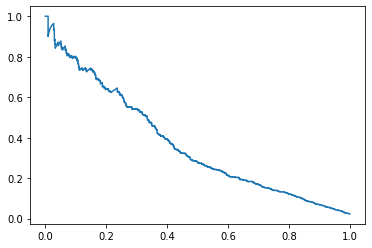

In [61]:
plt.plot(rc, pr)

In [36]:
X_tr

,amount_original,event_time_,amount_original.7,amount_original.8,amount_original.9,amount_original.10,amount_original.11,amount_original.12,amount_original.13,amount_original.14,amount_original.15,amount_original.16,amount_original.17,amount_original.18,amount_original.19,amount_original.20,amount_original.21,amount_original.22,amount_original.23,amount_original.24,amount_original.25,amount_original.26,amount_original.27,amount_original.35,amount_original.36,amount_original.37,amount_original.38,amount_original.39,amount_original.40,amount_original.41,amount_original.42,amount_original.43,amount_original.44,amount_original.45,amount_original.46,amount_original.47,amount_original.48,amount_original.49,amount_original.50,amount_original.51,...,20.3,21.1,22.1,23.1,24.1,25.1,26.1,27.1,28.1,29.1,30.1,31.1,32.1,33.1,34.1,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43.1,44.1,45.1,46.1,47.1,48.1,49.1,fraud interval.1,genue interval.1,mu.1,std.1,get_tr.1,get_amount.1,completed_tr.1,taked_amount.1,ratio count.1,ratio amount.1
128657,9500,1.554658e+09,0.0,0.0,8324.029118,1468.922416,0.0,0.00,4000.000000,0.000000,0.000000,0.184783,0.809783,0.000000,0.000000,0.005435,0.0,0.0,0.603499,0.106498,0.0,0.000000,0.290003,0.0,0.0,8324.029118,1468.922416,0.0,0.00,4000.000000,0.000000,0.000000,0.184783,0.809783,0.000000,0.000000,0.005435,0.0,0.0,0.603499,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
131477,48000,1.554491e+09,0.0,0.0,14286.125000,4479.569180,0.0,0.25,9407.142857,0.021505,0.000000,0.086022,0.655914,0.000000,0.086022,0.150538,0.0,0.0,0.507084,0.159002,0.0,0.000009,0.333905,0.0,0.0,14286.125000,4479.569180,0.0,0.25,9407.142857,0.021505,0.000000,0.086022,0.655914,0.000000,0.086022,0.150538,0.0,0.0,0.507084,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
134521,6400,1.554558e+09,0.0,0.0,1745.714286,466.266667,0.0,0.00,13100.000000,0.000000,0.000000,0.280000,0.600000,0.000000,0.000000,0.120000,0.0,0.0,0.114010,0.030451,0.0,0.000000,0.855539,0.0,0.0,1745.714286,466.266667,0.0,0.00,13100.000000,0.000000,0.000000,0.280000,0.600000,0.000000,0.000000,0.120000,0.0,0.0,0.114010,...,-0.593414,0.093608,-0.108844,0.123935,-0.099973,0.255819,-0.092967,0.318921,0.120662,-0.020680,0.314300,-0.007744,0.060471,-0.009570,0.028446,0.091166,-0.057163,-0.276038,0.191550,-0.448541,0.111437,-0.136092,-0.097761,0.082186,-0.245361,0.067827,0.581867,0.086649,-0.017169,0.030671,0.983871,0.981183,0.814320,0.548344,0.0,0.0,4.0,107900.0,1.000000,1.000000
46366,3500,1.554650e+09,0.0,0.0,9651.200000,1065.177762,0.0,0.00,8400.000000,0.000000,0.000000,0.107143,0.885714,0.000000,0.000000,0.007143,0.0,0.0,0.504866,0.055721,0.0,0.000000,0.439414,0.0,0.0,9651.200000,1065.177762,0.0,0.00,8400.000000,0.000000,0.000000,0.107143,0.885714,0.000000,0.000000,0.007143,0.0,0.0,0.504866,...,-0.254875,-0.530811,0.167265,0.234566,-0.349944,0.069541,-0.220416,-0.366811,-0.491359,0.561289,0.040608,0.116633,-0.452784,0.329268,-0.006309,-0.190562,0.149983,-0.148733,0.332911,-0.255611,0.363759,-0.304890,0.218761,-0.359085,-0.106156,0.183068,0.574103,0.415293,0.207345,-0.227074,0.806331,0.715084,1.084699,1.391169,0.0,0.0,1.0,3500.0,1.000000,1.000000
83732,2443,1.554456e+09,0.0,0.0,1000.000000,421.768214,0.0,0.00,2281.250000,0.000000,0.000000,0.029412,0.823529,0.014706,0.014706,0.117647,0.0,0.0,0.270050,0.113898,0.0,0.000000,0.616052,0.0,0.0,1000.000000,421.768214,0.0,0.00,2281

In [37]:
md.feature_importances_.argmax()

286

In [0]:
features = list(zip(X_tr.columns, md.feature_importances_))
features.sort(key = lambda x:-x[1])

In [0]:
'completed_tr.1', 'taked_amount.1', 'get_tr', 'get_amount', 'get_amount.1'

In [63]:
features

[('amount_original', 23.925197032754497),
 ('event_time_', 3.026145036637738),
 ('ratio count.1', 2.986383122156118),
 ('mu.1', 2.449943610705614),
 ('get_tr.1', 1.881980212742715),
 ('ratio amount.1', 1.7520993545768673),
 ('amount_original.65.1', 1.631778170082945),
 ('amount_original.10.1', 1.2326196854856317),
 ('amount_original.72.1', 1.2324180685479804),
 ('5.2', 1.1326987118505916),
 ('39.1', 0.9428937004597823),
 ('amount_original.66.1', 0.9179625015128441),
 ('18.2', 0.9109255932907268),
 ('amount_original.9.1', 0.9016359568409417),
 ('19.2', 0.9015444821691311),
 ('25.1', 0.8668133038250089),
 ('46.1', 0.8428000541055618),
 ('11.3', 0.8388542276338893),
 ('amount_original.16.1', 0.8319180589103328),
 ('amount_original.37.1', 0.7854703319786855),
 ('1.3', 0.7742608864634649),
 ('mu', 0.7301687059486811),
 ('12.2', 0.677591959588883),
 ('4.2', 0.6442707952167805),
 ('6.2', 0.6429541458303715),
 ('amount_original.18.1', 0.6331327901248646),
 ('36', 0.6300877580572337),
 ('std.1'